In [1]:
sparse_file = "/shares/bulk/oagba/data/output_basic_15k/symptoms/csv/parsed/train.csv_sparse.csv"

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(sparse_file)

In [4]:
df.columns

Index(['Index', 'LABEL', 'GENDER', 'RACE', 'AGE', 'SYMPTOMS'], dtype='object')

In [5]:
df['NUM_SYMPTOMS'] =  df.SYMPTOMS.apply(lambda v: len(v.split(",")))

In [6]:
grp = df.groupby('NUM_SYMPTOMS')

In [7]:
cnt = grp.size()

In [8]:
df.columns

Index(['Index', 'LABEL', 'GENDER', 'RACE', 'AGE', 'SYMPTOMS', 'NUM_SYMPTOMS'], dtype='object')

In [9]:
import matplotlib.pyplot as plt

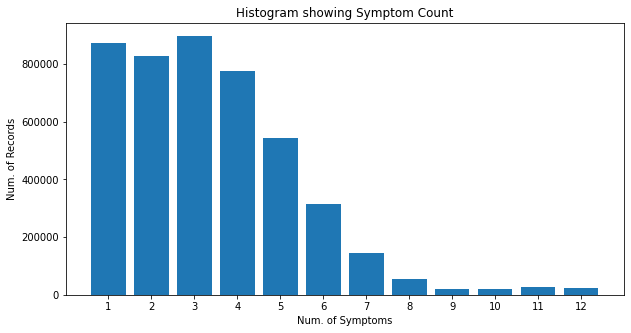

In [10]:
fig, ax = plt.subplots()
ax.bar(cnt.index, cnt)
ax.set_title("Histogram showing Symptom Count")
ax.set_ylabel("Num. of Records")
ax.set_xlabel("Num. of Symptoms")
_ = ax.set_xticks(range(1, 13))
fig.set_size_inches(10, 5)

In [11]:
import os

img_dir = "/home/oagba/bulk/data/reports/figures"
filename = os.path.join(img_dir, "sym_histogram.pdf")


fig.savefig(filename)

In [12]:
# want to get the condition counts
directories = [
    "output_basic_15k",
    "output_basic_pct_10_15k",
    "output_basic_pct_20_15k",
    "output_basic_pct_30_15k",
    "output_basic_pct_50_15k",
    "output_basic_pct_70_15k"
]

In [13]:
sparse_tpl = "/shares/bulk/oagba/data/{}/symptoms/csv/parsed/train.csv_sparse.csv"

In [14]:
files = []
for item in directories:
    filename = sparse_tpl.format(item)
    files.append(filename)

In [15]:
df = pd.read_csv(files[0])

In [16]:
grp = df.groupby('LABEL')

In [18]:
from thesislib.utils.ml import models

In [19]:
num_symptoms = 376

In [27]:
sparsifier = models.ThesisSymptomSparseMaker(num_symptoms=num_symptoms)

In [36]:
import numpy as np

In [45]:
symptom_pct = np.zeros((801, 376))

In [46]:
for idx in range(801):
    df_idx = grp.get_group(idx)
    df_idx = df_idx.drop(columns=['LABEL', 'Index'])
    df_idx = sparsifier.fit_transform(df_idx)
    
    symptom_pct[idx, :] = np.mean(df_idx[:, 3:], axis=0)

In [48]:
pcts = []

In [49]:
for idx in range(1, len(files)):
    df= pd.read_csv(files[0])
    grp = df.groupby('LABEL')
    pct_idx = np.zeros((801, 376))
    for idx in range(801):
        df_idx = grp.get_group(idx)
        df_idx = df_idx.drop(columns=['LABEL', 'Index'])
        df_idx = sparsifier.fit_transform(df_idx)

        pct_idx[idx, :] = np.mean(df_idx[:, 3:], axis=0)
    pcts.append(pct_idx)

In [54]:
from scipy.stats import wasserstein_distance

In [60]:
distance = np.zeros((801, 5))

In [85]:
for idx in range(801):
    base = symptom_pct[idx, :][symptom_pct[idx, :] > 0]
    for jdx in range(5):
        curr = pcts[jdx][idx, :][pcts[jdx][idx, :] > 0]
        distance[idx, jdx] = wasserstein_distance(base, curr)
        

In [90]:
distance[0, :]

array([0., 0., 0., 0., 0.])

<ErrorbarContainer object of 3 artists>

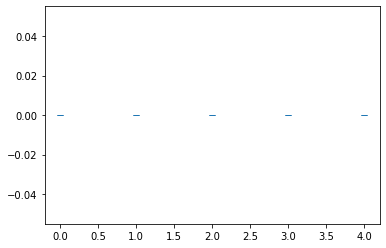

In [87]:
plt.errorbar(range(5), avg, std, linestyle='None', capsize=3)

In [66]:
avg

array([0., 0., 0., 0., 0.])

In [94]:
5//3

1